<a href="https://colab.research.google.com/github/David-Kumawat/Credit-Card-Default-Prediction-Classification/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Credit Card Default Detection



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Problem Statement**


The aim is to develop a system or model that can accurately identify and prevent fraudulent transactions on credit cards. The primary objective is to protect both the bank and its customers from financial losses and potential security breaches. Credit card fraud can lead to significant financial damages, loss of customer trust, and damage to the bank's reputation. Therefore, it is crucial to employ effective fraud detection mechanisms to detect and prevent fraudulent activities.



# ***Let's Begin !***


## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

defaulter = pd.read_excel('/content/drive/MyDrive/Supervised Learning/Classification/default of credit card clients.xls')

### Dataset First View

In [3]:
# Dataset First View
pd.set_option('display.max_columns',None)
defaulter.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

defaulter.shape

(30001, 25)

### Dataset Information

In [5]:
# Dataset Info

defaulter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [6]:
from pandas.core.base import duplicated
# Dataset Duplicate Values Count

len(defaulter[defaulter.duplicated()])

0



#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

print(defaulter.isnull().sum())

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64


<Axes: >

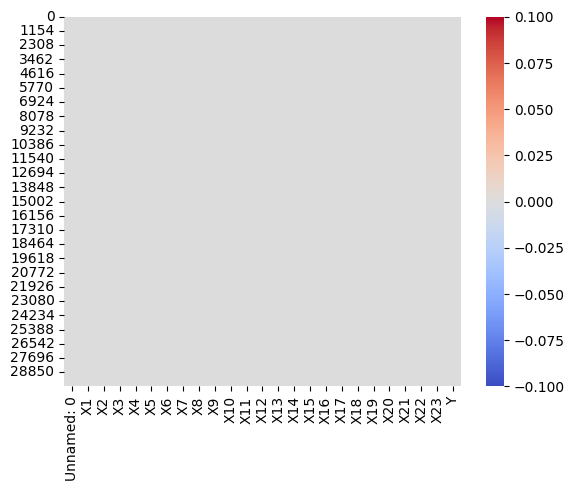

In [9]:
# Visualizing the missing values

sns.heatmap(defaulter.isnull(),cmap='coolwarm')

### What did you know about your dataset?

**Answer:** The dataset given is from the bank industry, and we have to analyse the default of our clients. In Dataset, I have 30001 Rows and 25 Columns and All 25 Columns are Object Data types. The Dataset does not have duplicated values and also does not have null values in it.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns

defaulter.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [11]:
# Setting to maximum display all columns
pd.set_option('display.max_columns', None)
# Setting 1st row names as columns name
defaulter.columns = defaulter.iloc[0]
defaulter.drop(defaulter.index[0],inplace=True)
# Resetting index
defaulter.reset_index(inplace=True, drop=True)
defaulter.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
# Recheck Columns

defaulter.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [35]:
# Dataset Describe

defaulter.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Variables Description

###There are 25 variables:

####ID: ID of each client
####LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
####SEX: Gender (1=male, 2=female)
####EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
####MARRIAGE: Marital status (1=married, 2=single, 3=others)
####AGE: Age in years
####PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
####PAY_2: Repayment status in August, 2005 (scale same as above)
####PAY_3: Repayment status in July, 2005 (scale same as above)
####PAY_4: Repayment status in June, 2005 (scale same as above)
####PAY_5: Repayment status in May, 2005 (scale same as above)
####PAY_6: Repayment status in April, 2005 (scale same as above)
####BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
####BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
####BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
####BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
####BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
####BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
####PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
####PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
####PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
####PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
####PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
####PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
####default.payment.next.month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.

for i in defaulter.columns.tolist():
  print("No. of unique values in ",i,"is",defaulter[i].nunique(),".")

No. of unique values in  ID is 30000 .
No. of unique values in  LIMIT_BAL is 81 .
No. of unique values in  SEX is 2 .
No. of unique values in  EDUCATION is 7 .
No. of unique values in  MARRIAGE is 4 .
No. of unique values in  AGE is 56 .
No. of unique values in  PAY_0 is 11 .
No. of unique values in  PAY_2 is 11 .
No. of unique values in  PAY_3 is 11 .
No. of unique values in  PAY_4 is 11 .
No. of unique values in  PAY_5 is 10 .
No. of unique values in  PAY_6 is 10 .
No. of unique values in  BILL_AMT1 is 22723 .
No. of unique values in  BILL_AMT2 is 22346 .
No. of unique values in  BILL_AMT3 is 22026 .
No. of unique values in  BILL_AMT4 is 21548 .
No. of unique values in  BILL_AMT5 is 21010 .
No. of unique values in  BILL_AMT6 is 20604 .
No. of unique values in  PAY_AMT1 is 7943 .
No. of unique values in  PAY_AMT2 is 7899 .
No. of unique values in  PAY_AMT3 is 7518 .
No. of unique values in  PAY_AMT4 is 6937 .
No. of unique values in  PAY_AMT5 is 6897 .
No. of unique values in  PAY_AMT

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Making of the dataset

df = defaulter.copy()

In [19]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [22]:
# making dataset more readable by renaming columns
rename_list = ['cust_id','max_credit_limit', 'gender', 'education', 'marital_status', 'age',
               'pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april',
               'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
               'amt_paid_sept', 'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun', 'amt_paid_may', 'amt_paid_april',
               'default_nxt_mnth']
col_rename = dict(zip(df.columns,rename_list))
df = df.rename(columns=col_rename)

In [23]:
# information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cust_id           30000 non-null  object
 1   max_credit_limit  30000 non-null  object
 2   gender            30000 non-null  object
 3   education         30000 non-null  object
 4   marital_status    30000 non-null  object
 5   age               30000 non-null  object
 6   pay_status_sept   30000 non-null  object
 7   pay_status_aug    30000 non-null  object
 8   pay_status_july   30000 non-null  object
 9   pay_status_june   30000 non-null  object
 10  pay_status_may    30000 non-null  object
 11  pay_status_april  30000 non-null  object
 12  bill_sept         30000 non-null  object
 13  bill_aug          30000 non-null  object
 14  bill_july         30000 non-null  object
 15  bill_june         30000 non-null  object
 16  bill_may          30000 non-null  object
 17  bill_april  

#### Here we can see all columns are string type so I need to change columns string dtype to numeric.

In [36]:
import ast
# applying eval() function on all string values of all columns
for item in df.columns:
    def safe_eval(row):
        try:
            return eval(row)
        except (SyntaxError, NameError, TypeError):
            return row  # Return the original value if eval() fails

    df[item] = df[item].apply(safe_eval)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   cust_id           30000 non-null  int64
 1   max_credit_limit  30000 non-null  int64
 2   gender            30000 non-null  int64
 3   education         30000 non-null  int64
 4   marital_status    30000 non-null  int64
 5   age               30000 non-null  int64
 6   pay_status_sept   30000 non-null  int64
 7   pay_status_aug    30000 non-null  int64
 8   pay_status_july   30000 non-null  int64
 9   pay_status_june   30000 non-null  int64
 10  pay_status_may    30000 non-null  int64
 11  pay_status_april  30000 non-null  int64
 12  bill_sept         30000 non-null  int64
 13  bill_aug          30000 non-null  int64
 14  bill_july         30000 non-null  int64
 15  bill_june         30000 non-null  int64
 16  bill_may          30000 non-null  int64
 17  bill_april        30000 non-nul

In [34]:
# There are total 30000 unique customers in our dataset; without any duplications
df['cust_id'].nunique()

30000

In [44]:
# Checking the count of the defaulters and no defaulters
value_counts = df['default_nxt_mnth'].value_counts()

# Display the count of values
print(value_counts)

0    23364
1     6636
Name: default_nxt_mnth, dtype: int64


In [47]:
# Count of class one
count_class_one = 6636

# Updated total count
total_count = 30000

# Calculate the percentage
percentage_class_one = (count_class_one / total_count) * 100

print("Percentage of class one:", percentage_class_one, "%")

Percentage of class one: 22.12 %


In [33]:
# Checking description of the dataset
df.describe()

,cust_id,max_credit_limit,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### What all manipulations have you done and insights you found?

**Answer Here:** First I Create a copy of the Dataframe named df. then I the changed Columns name for better interpretation. after this, I checked the info and found all columns are object type but all columns should in categorical or numerical for this I created a function that converts all object dtype to their original dtype.
we have 30,000 unique customers and in our dataset defaulters are very high which is 22.12%. and we have Five Numerical Features: cust_id, max_credit_limit, age, bill_x and amt_paid_x. The Rest are categorical type features.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart on Dependant Variable i.e., Default (Univariate)

In [50]:
df.head()

,cust_id,max_credit_limit,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


0    23364
1     6636
Name: default_nxt_mnth, dtype: int64
 


<Axes: ylabel='default_nxt_mnth'>

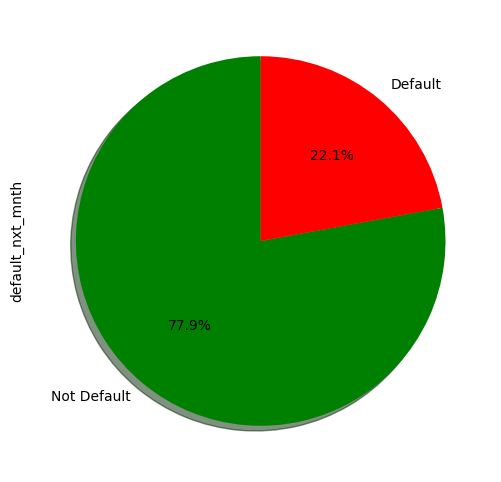

In [49]:
# Chart - 1 visualization code
# Dependant Column Value Counts

print(df.default_nxt_mnth.value_counts())
print(" ")

# Dependant Variable Column Visualization

df['default_nxt_mnth'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Default','Default'],
                               colors=['Green','red'],
                               explode=[0,0]
                              )

##### 1. Why did you pick the specific chart?

**Answer Here:** A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through an area covered in a circle with different colours. Where different percentage comparison comes into action pie chart is used frequently. So, I used a Pie chart which helped me to get the percentage comparison of the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-** From the above chart I got to know that, not Defaulters which is 77.9% of the whole customer's data given in the dataset. On the other hand, 6636 customers are defaulters is 22.1%% of the whole customer data given in the dataset.

22.1% of customers are Default which does not look like a small number. So, Immediate action should be taken.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** Customer default is a loss for the company and when it goes to a high percentage bank will be closed, or the customer which is defaulted waste money of the bank and it won't give business in future. therefore banks to strict for defaulters. Default is significant in the Bank industry because it directly affects the Earnings of the Bank.

It's easy to lose money but too difficult to recover that money.



#### Chart - 2

2    18112
1    11888
Name: gender, dtype: int64


Text(0.5, 1.0, 'Distribution of customers basis Gender')

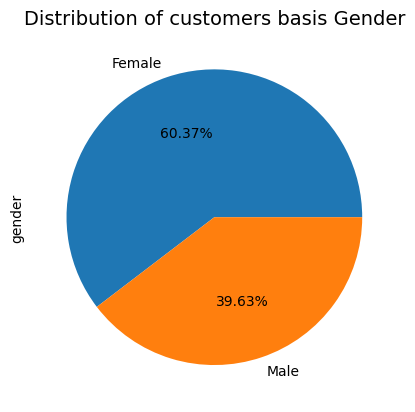

In [53]:
# Checking unique categories and their counts for Gender column
counts = df['gender'].value_counts()
print(counts)
# Pie-chart to show distribution of customers basis Gender
labels = ['Female','Male']
df['gender'].value_counts().plot(kind='pie', autopct='%1.2f%%', labels=labels)
plt.title('Distribution of customers basis Gender', fontsize = 14)


##### 1. Why did you pick the specific chart?

**Answer:-**
A pie chart is used to visually represent the composition of a whole by displaying proportions of different categories, making it easy to understand the distribution of data at a glance.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**
Here we can see the majority of class females around 60%. I think because females do more shopping that's why they have more credit cards compared to males, may be defaulter also more in females because high number of credit cards they have.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-** Yes it will impact positively because it is a study I read somewhere females spend more than males and our high number of credit cards owned by females mean the card will be used often. that's how a credit card company earns. When customers use their card.

#### Chart - 3- Pie Chart on Education Column

In [55]:
# Checking unique categories and their counts for Education column
df['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [56]:
# Since we have no idea about 0, 5 and 6 categories and their counts are quite less;
# Therefore, i have decided to combine 0, 5, 6 and 4 education levels as 4 i.e., Others
df.loc[df['education']==0,'education'] = 4
df.loc[df['education']==5,'education'] = 4
df.loc[df['education']==6,'education'] = 4
df['education'].nunique()

4

Text(0, 0.5, 'Education Level')

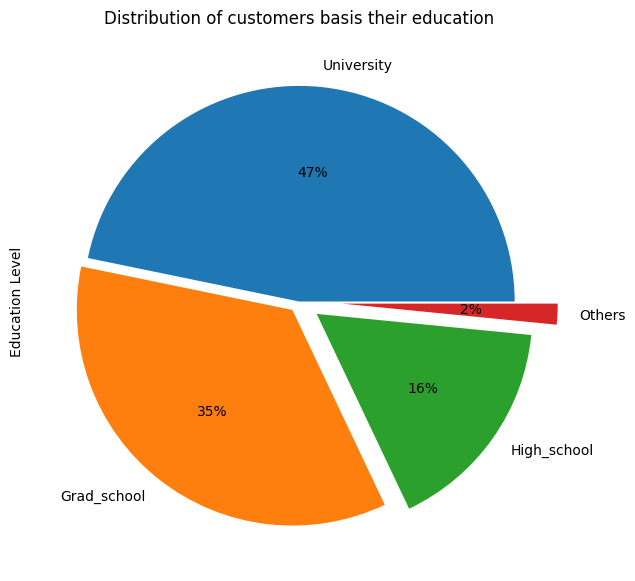

In [57]:
# Creating Pie-chart to show percentages of customers of different education categories
labels = ['University','Grad_school','High_school','Others']
explode = (0, 0.05, 0.1, 0.2)
df['education'].value_counts().plot(kind='pie', figsize=(9,7), explode=explode, autopct='%1.0f%%', labels=labels)
plt.title('Distribution of customers basis their education', fontsize = 12)
plt.ylabel('Education Level', fontsize = 10)

##### 1. Why did you pick the specific chart?

**Answer:-**

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through an area covered in a circle with different colours. Where different percentage comparison comes into action pie chart is used frequently.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

The Majority of customers have a university-level education (~47%), followed by Graduate school-level education (around 35%). only 16% have high-school level education. That meant most of the customers were above 21 years old. they will spend more because they are young.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

Because most of the customers are educated and they are done/pursuing their masters and college they will pay their expenses on time. maybe it happens most customers are university students and they spend unnecessarily and they default. it will impact negatively and positively.

#### Chart - 4- Distribution of Customers age

<Axes: >

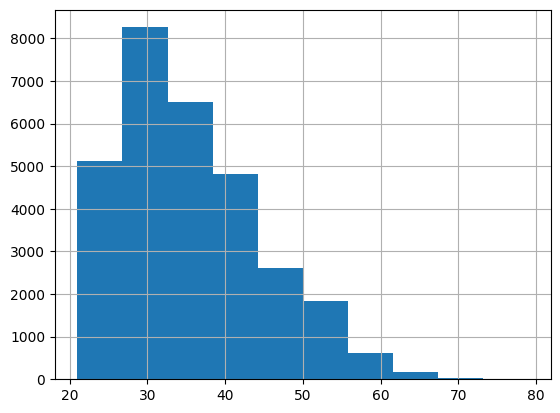

In [58]:
# Histogram to show counts of customers of different age groups
df.age.hist()

<Axes: xlabel='age', ylabel='Density'>

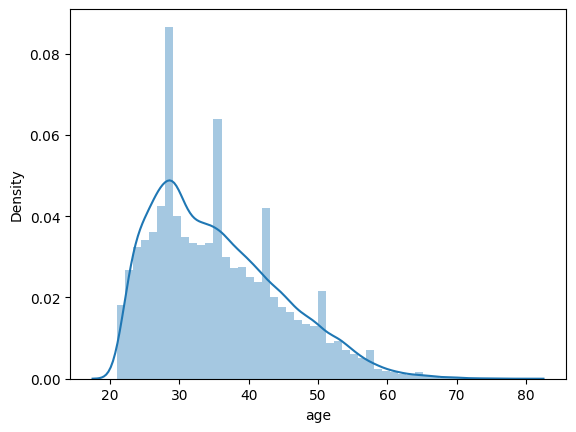

In [62]:
# density plot to show counts of customers of different ages
sns.distplot(df['age'])


<Axes: >

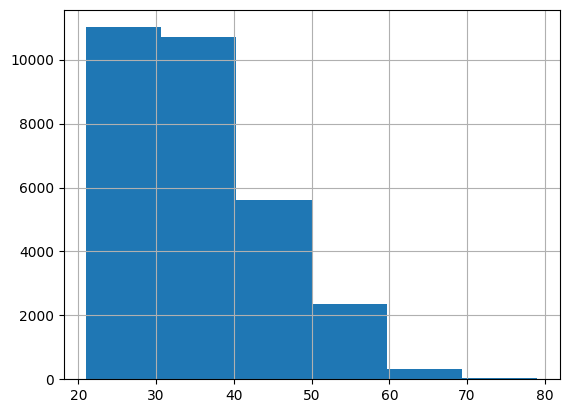

In [63]:
# Histogram to show counts of customers of 6 different age groups
df.age.hist(bins=6)


##### 1. Why did you pick the specific chart?

**Answer:-**

Histograms are used to display the distribution and frequency of numerical data, making it easy to identify patterns and understand the data's central tendencies and variations.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**  Here we can see we have all age customers 21 to 70. most of the customers are between 21 to 40 age and generally this age group spends more. and age column is rightly skewed.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

Yes, it will impact positively because most of the customers are between 21 to 40 and they spend more and as they spend as bank will earn.

#### Chart - 5 Pie Chart with marital_status

In [59]:
# Checking unique categories and their counts for Marriage column
df['marital_status'].value_counts()


2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

Since class 0 has very little data, therefore training the model with less data will cause overfitting and lead to less generalization. That's why I'm combining zero(0) with 3.


In [60]:
# combinig 0 and 3
df.loc[df['marital_status']==0,'marital_status'] = 3
df['marital_status'].unique()

array([1, 2, 3])

Text(0, 0.5, 'Marital status')

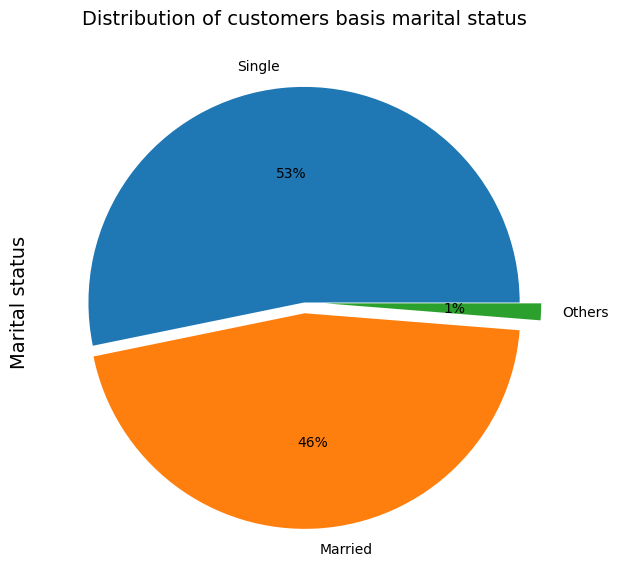

In [61]:
# Plotting pie-chart showing distribution of customers basis Marital status
labels = ['Single','Married','Others']
explode = (0, 0.05, 0.1)
df['marital_status'].value_counts().plot(kind='pie', figsize = (9,7), explode=explode, autopct='%1.0f%%', labels=labels)
plt.title('Distribution of customers basis marital status', fontsize = 14)
plt.ylabel('Marital status', fontsize = 14)


##### 1. Why did you pick the specific chart?

**Answer:-**

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through an area covered in a circle with different colours. Where different percentage comparison comes into action pie chart is used frequently.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

Here we can see 53% of customers are single and 46% are married. both married and singles are somewhat are in the same count.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

#### Chart - 6

##### 1. Why did you pick the specific chart?

**Answer:-**

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**


#### Chart - 7

##### 1. Why did you pick the specific chart?

**Answer:-**

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

#### Chart - 8

##### 1. Why did you pick the specific chart?

**Answer:-**

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

#### Chart - 9

##### 1. Why did you pick the specific chart?

**Answer:-**

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

#### Chart - 10

##### 1. Why did you pick the specific chart?


**Answer:-**

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

#### Chart - 11

##### 1. Why did you pick the specific chart?

**Answer:-**

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

#### Chart - 13

##### 1. Why did you pick the specific chart?

**Answer:-**

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

#### Chart - 14

##### 1. Why did you pick the specific chart?

**Answer:-**

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

#### Chart - 15

##### 1. Why did you pick the specific chart?

**Answer:-**

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**